## THE IMPACT OF HAVING PARENTS IN TECH ON STUDENT PERFORMANCE & HABITS


#Imports and data loading:

##A. Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder

##B. Drive and loading the df

In [ ]:
# import drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/CMSC320/Homework 5/GPA Dataset (Let's get spicy) (Responses) - Form Responses 1.csv")

#Data cleaning:

##A. Fixing the column names


In [ ]:
df.columns

Index(['Timestamp', 'What state are you from?', 'Major (Check all that apply)',
       'At what age did you start programming?',
       'Have you at any point attended private school?',
       'Do you have a scholarship?', 'Do you have a parent in tech?',
       'Do you study with friends?', 'Do you take notes in classes?',
       'How many credits did you take last semester?',
       'What is your average screentime?',
       'What is your average daily time on Tik Tok or Tik Tok equivalents?',
       'How many hours of sleep do you get a night?',
       'What was your GPA LAST SEMESTER?',
       'What was your GPA THE SEMESTER BEFORE THAT?'],
      dtype='object')

In [ ]:
df.columns = ["Time", "State", "Major", "Prog_Age", "Private_School", "Scholarship", "Tech_Parents", "Grp_Study", "Notes", "Creds_last", "Screentime", "Tiktok_Time",
              "Sleep", "GPA_Last", "GPA_Lasttolast"]

df

,Time,State,Major,Prog_Age,Private_School,Scholarship,Tech_Parents,Grp_Study,Notes,Creds_last,Screentime,Tiktok_Time,Sleep,GPA_Last,GPA_Lasttolast
0,11/5/2024 14:57:00,NJ,Computer Science,14.0,No,NaN,No parents,Sometimes,"Yes, on a tablet",16,5.0,2.0,7.0,2.780,2.600
1,11/5/2024 14:57:33,VA,Computer Science,8.0,No,Partial,Two parents,Sometimes,"Yes, on paper",17,3.5,1.0,7.0,3.900,3.700
2,11/5/2024 14:57:41,MD,Computer Science,14.0,No,Partial,No parents,Frequently,"Yes, on paper",17,6.5,2.0,8.0,3.900,4.000
3,11/5/2024 14:57:50,VA,Computer Science,14.0,No,Partial,One parent,Frequently,"Yes, on paper",18,6.0,2.0,8.0,4.000,4.000
4,11/5/2024 14:57:54,CA,"Data, Government and Politics",11.0,No,Partial,Two parents,Frequently,"Yes, on a computer",15,5.0,1.0,8.0,4.000,4.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,11/14/2024 12:51:59,MD,Computer Science,16.0,No,NaN,One parent,Sometimes,"Yes, on paper",15,5.5,1.0,8.0,3.557,3.504
69,11/14/2024 17:37:45,MD,Computer Science,15.0,No,Full,No parents,Never,"Yes, on paper",17,10.0,1.0,8.0,4.000,4.000
70,11/14/2024 20:44:54,MD,Computer Science,17.0,No,NaN,No parents,Never,"Yes, on paper",16,5.0,2.0,5.0,3.500,3.700
71,11/15/2024 13:21:20,NJ,Computer Science,15.0,No,NaN,One parent,Frequently,"Yes, on paper",17,9.0,3.0,6.0,3.894,3.940


##B. Fixing columns types

In [ ]:
# Printing the datatypes
df.dtypes

,0
Time,object
State,object
Major,object
Prog_Age,float64
Private_School,object
Scholarship,object
Tech_Parents,object
Grp_Study,object
Notes,object
Creds_last,int64


In [ ]:
# Changing the time column to datetime
df["Time"] = pd.to_datetime(df["Time"])

##C. Changing values


In [ ]:
for col in df.columns:
  print(col, df[col].unique())

Time <DatetimeArray>
['2024-11-05 14:57:00', '2024-11-05 14:57:33', '2024-11-05 14:57:41',
 '2024-11-05 14:57:50', '2024-11-05 14:57:54', '2024-11-05 14:58:00',
 '2024-11-05 14:58:20', '2024-11-05 14:59:22', '2024-11-05 14:59:31',
 '2024-11-05 14:59:38', '2024-11-05 14:59:43', '2024-11-05 14:59:50',
 '2024-11-05 14:59:51', '2024-11-05 14:59:53', '2024-11-05 15:00:07',
 '2024-11-05 15:01:41', '2024-11-05 15:01:54', '2024-11-05 15:02:44',
 '2024-11-05 15:07:35', '2024-11-05 15:11:10', '2024-11-05 15:15:52',
 '2024-11-05 15:16:54', '2024-11-05 15:20:01', '2024-11-05 15:21:44',
 '2024-11-05 15:26:55', '2024-11-05 15:30:35', '2024-11-05 15:39:01',
 '2024-11-05 15:39:29', '2024-11-05 15:40:09', '2024-11-05 15:40:46',
 '2024-11-05 15:49:03', '2024-11-05 15:51:58', '2024-11-05 16:03:32',
 '2024-11-05 16:03:57', '2024-11-05 16:04:31', '2024-11-05 16:21:50',
 '2024-11-05 17:08:16', '2024-11-05 17:55:49', '2024-11-05 19:36:37',
 '2024-11-05 19:38:36', '2024-11-05 19:39:08', '2024-11-05 20:54:32',

In [ ]:
df["Major"] = df["Major"].replace(["Computer Science", "Data, Government and Politics", "Math, Computer Science", "Computer Science, Entrepreneurship and Innovation",
                                   "Bioengineering", "Computer Science, Biochemistry"],["CS", "D+GP", "M+CS", "CS+EI", "BEng", "CS+BChem"])

df['Double_Major'] = df['Major'].apply(lambda x: 1 if '+' in str(x) else 0)

df["Private_School"] = df["Private_School"].replace(["Yes", "No"], [1,0])

df["Scholarship"] = df["Scholarship"].replace(["Partial", "Full"], [1,2])
df['Scholarship'].fillna(0, inplace=True)

df["Tech_Parents"] = df["Tech_Parents"].replace(["No parents","One parent", "Two parents"], [0,1,2])

df["Grp_Study"] = df["Grp_Study"].replace(["Never", "Sometimes", "Frequently"], [0,1,2])

df["Notes"] = df["Notes"].replace(["Yes, on a tablet", "Yes, on paper", "Yes, on a computer"], ["Tablet", "Paper", "Computer"])

# screentime in hrs
# Adjust the Screentime column
df['Screentime'] = df['Screentime'].apply(lambda x: x / 60 if x > 24 else x)

#Tiktok in hrs
df['Tiktok_Time'] = df['Tiktok_Time'].apply(lambda x: x / 60 if x > 24 else x)

#dropping timestamp column
df.drop(columns=["Time"], inplace=True)


<ipython-input-9-47180d8f1f2d>:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Private_School"] = df["Private_School"].replace(["Yes", "No"], [1,0])
<ipython-input-9-47180d8f1f2d>:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Scholarship"] = df["Scholarship"].replace(["Partial", "Full"], [1,2])
<ipython-input-9-47180d8f1f2d>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will

In [ ]:
for col in df.columns:
  print(col, df[col].unique())

State ['NJ' 'VA' 'MD' 'CA' 'PA' 'TX' 'Non-US' 'MA' nan 'CT' 'NY']
Major ['CS' 'D+GP' 'M+CS' 'CS+EI' 'BEng' 'CS+BChem']
Prog_Age [14.  8. 11. 15. 12. 17.  9. 13. 23. 18. 10. 16. 19.  1. nan 20.]
Private_School [0 1]
Scholarship [0. 1. 2.]
Tech_Parents [0 2 1]
Grp_Study [1 2 0]
Notes ['Tablet' 'Paper' 'Computer' 'No']
Creds_last [16 17 18 15 12 14 19 20 13 24]
Screentime [ 5.          3.5         6.5         6.          7.          4.
  2.7         9.                 nan  8.          3.          1.
  2.          1.5         7.5        10.5        10.          5.38333333
 15.         16.          4.5        12.          5.5       ]
Tiktok_Time [2.00000000e+00 1.00000000e+00 5.00000000e-01 1.00000000e-01
 2.50000000e+00 1.00000000e-03 1.10000000e+01            nan
 3.00000000e+00 4.00000000e+00 1.50000000e+00 6.00000000e+00
 1.70000000e+00 5.66666667e-01 1.20000000e-01 5.00000000e+00
 2.50000000e-01]
Sleep [ 7.   8.   7.5  5.   nan  6.   9.  10.   5.5  6.5]
GPA_Last [2.78  3.9   4.    2.92

##D. Handling Nulls

In [ ]:
df.isna().sum()

# Print only the number of nulls in columns with nulls
df.isna().sum()[df.isna().sum() > 0]

,0
State,1
Prog_Age,1
Screentime,3
Tiktok_Time,4
Sleep,1
GPA_Last,3
GPA_Lasttolast,3


In [ ]:
# Print rows with nulls
df[df.isna().any(axis=1)]

,State,Major,Prog_Age,Private_School,Scholarship,Tech_Parents,Grp_Study,Notes,Creds_last,Screentime,Tiktok_Time,Sleep,GPA_Last,GPA_Lasttolast,Double_Major
14,TX,CS,13.0,0,1.0,1,2,Paper,18,4.0,NaN,NaN,NaN,NaN,0
16,MD,CS,14.0,0,0.0,0,2,Paper,14,NaN,3.0,6.0,3.750,2.270,0
35,NaN,CS,15.0,0,1.0,1,1,Tablet,15,4.0,1.0,7.0,3.100,2.900,0
55,MD,BEng,NaN,1,1.0,1,1,Tablet,15,3.0,2.0,8.0,NaN,NaN,0
63,Non-US,CS,19.0,0,0.0,0,1,Computer,18,NaN,NaN,7.0,3.116,3.694,0
64,MD,CS,19.0,1,2.0,2,0,Paper,12,NaN,NaN,6.0,NaN,NaN,0
66,MD,M+CS,13.0,1,0.0,0,1,Tablet,24,2.0,NaN,9.0,4.000,4.000,1


In [ ]:
# What percent of rows have nulls
df.isna().any(axis=1).sum()/len(df) * 100

9.58904109589041

As rows with nulls is just 9.6 percent of the data, I am dropping it.

In [ ]:
# Deleting the rows with nulls
df = df.dropna()
df.isna().sum()

,0
State,0
Major,0
Prog_Age,0
Private_School,0
Scholarship,0
Tech_Parents,0
Grp_Study,0
Notes,0
Creds_last,0
Screentime,0


##E. Checking Stats outliers manage

In [ ]:
df.describe()

,Prog_Age,Private_School,Scholarship,Tech_Parents,Grp_Study,Creds_last,Screentime,Tiktok_Time,Sleep,GPA_Last,GPA_Lasttolast,Double_Major
count,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000
mean,14.212121,0.212121,0.439394,0.696970,0.909091,15.454545,6.281566,1.983904,7.143939,3.679439,3.675136,0.242424
std,3.385558,0.411943,0.610896,0.822187,0.649906,2.016713,2.917554,1.797649,0.991367,0.334200,0.347504,0.431834
min,1.000000,0.000000,0.000000,0.000000,0.000000,12.000000,1.000000,0.001000,5.000000,2.780000,2.600000,0.000000
25%,12.000000,0.000000,0.000000,0.000000,0.250000,15.000000,5.000000,1.000000,7.000000,3.500000,3.500000,0.000000
50%,14.000000,0.000000,0.000000,0.000000,1.000000,15.000000,5.191667,1.500000,7.000000,3.778000,3.800000,0.000000
75%,17.000000,0.000000,1.000000,1.000000,1.000000,17.000000,7.375000,3.000000,8.000000,3.997500,3.985250,0.000000
max,23.000000,1.000000,2.000000,2.000000,2.000000,20.000000,16.000000,11.000000,10.000000,4.000000,4.000000,1.000000


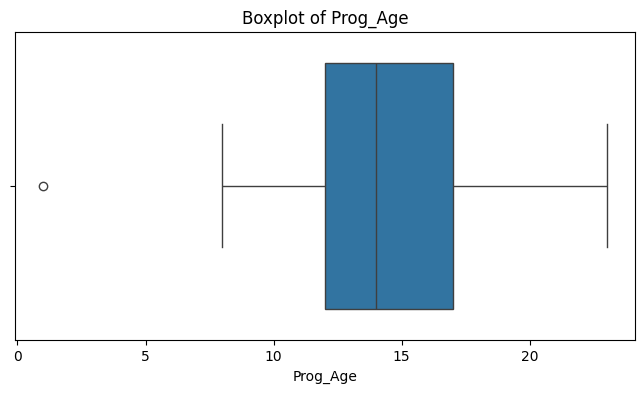

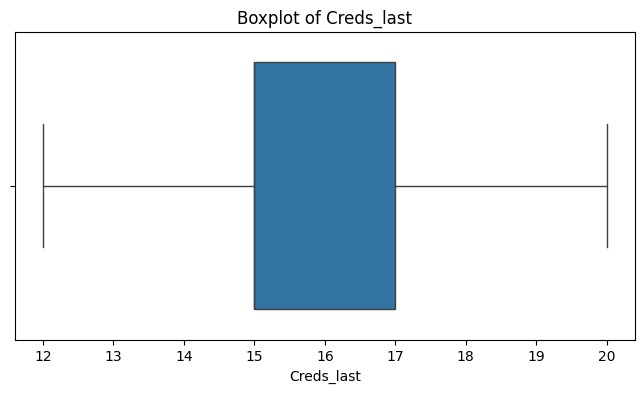

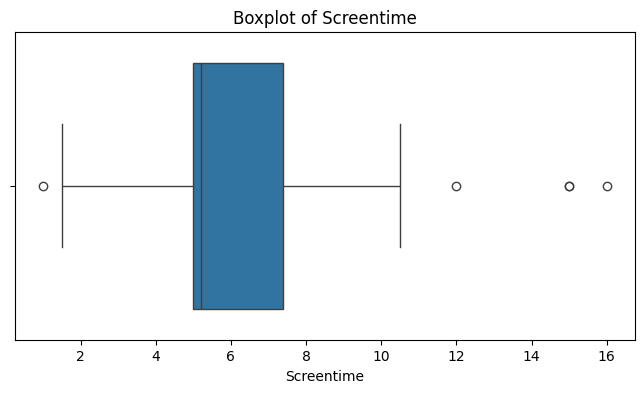

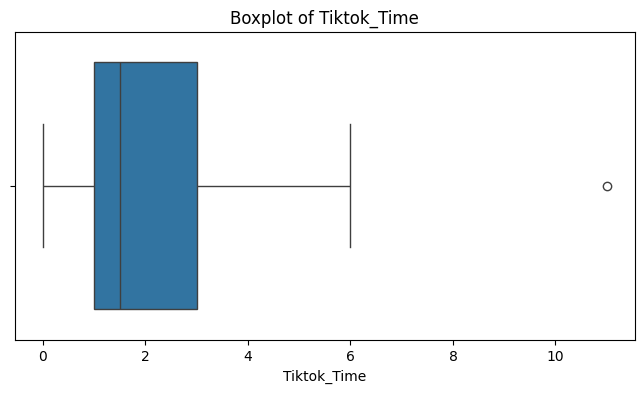

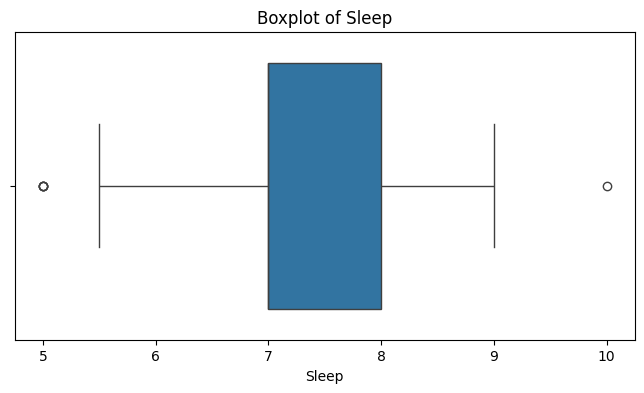

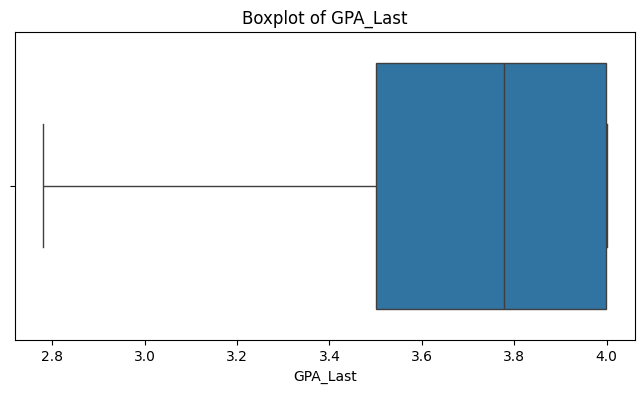

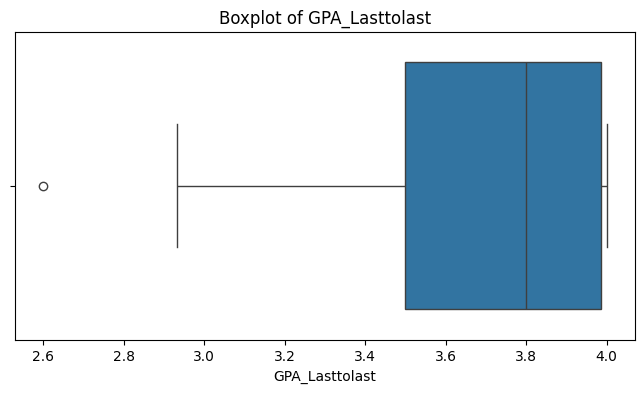

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical columns
numerical_columns = [
    "Prog_Age", "Creds_last", "Screentime", "Tiktok_Time",
    "Sleep", "GPA_Last", "GPA_Lasttolast"
]

# Plot boxplots for numerical columns
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

only alarming outlier to remove - Started Programming at 1.

In [ ]:
# Remove data where Prog_Age is 1
df = df[df["Prog_Age"] != 1]
df["Prog_Age"].unique()

array([14.,  8., 11., 15., 12., 17.,  9., 23., 18., 13., 10., 16., 19.,
       20.])

##F. Visualizing clean df

In [ ]:
df

,State,Major,Prog_Age,Private_School,Scholarship,Tech_Parents,Grp_Study,Notes,Creds_last,Screentime,Tiktok_Time,Sleep,GPA_Last,GPA_Lasttolast,Double_Major
0,NJ,CS,14.0,0,0.0,0,1,Tablet,16,5.0,2.0,7.0,2.780,2.600,0
1,VA,CS,8.0,0,1.0,2,1,Paper,17,3.5,1.0,7.0,3.900,3.700,0
2,MD,CS,14.0,0,1.0,0,2,Paper,17,6.5,2.0,8.0,3.900,4.000,0
3,VA,CS,14.0,0,1.0,1,2,Paper,18,6.0,2.0,8.0,4.000,4.000,0
4,CA,D+GP,11.0,0,1.0,2,2,Computer,15,5.0,1.0,8.0,4.000,4.000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,MD,CS,16.0,0,0.0,1,1,Paper,15,5.5,1.0,8.0,3.557,3.504,0
69,MD,CS,15.0,0,2.0,0,0,Paper,17,10.0,1.0,8.0,4.000,4.000,0
70,MD,CS,17.0,0,0.0,0,0,Paper,16,5.0,2.0,5.0,3.500,3.700,0
71,NJ,CS,15.0,0,0.0,1,2,Paper,17,9.0,3.0,6.0,3.894,3.940,0


#1. Which was the most predictive factor for GPA? i.e., which factor had the most "power" over predicting the GPA?

Your Answer: Only Scholarship (Pvalues of 0.006 and 0.05 for the two sems) and the GPA of the other semester help in predicting GPA.

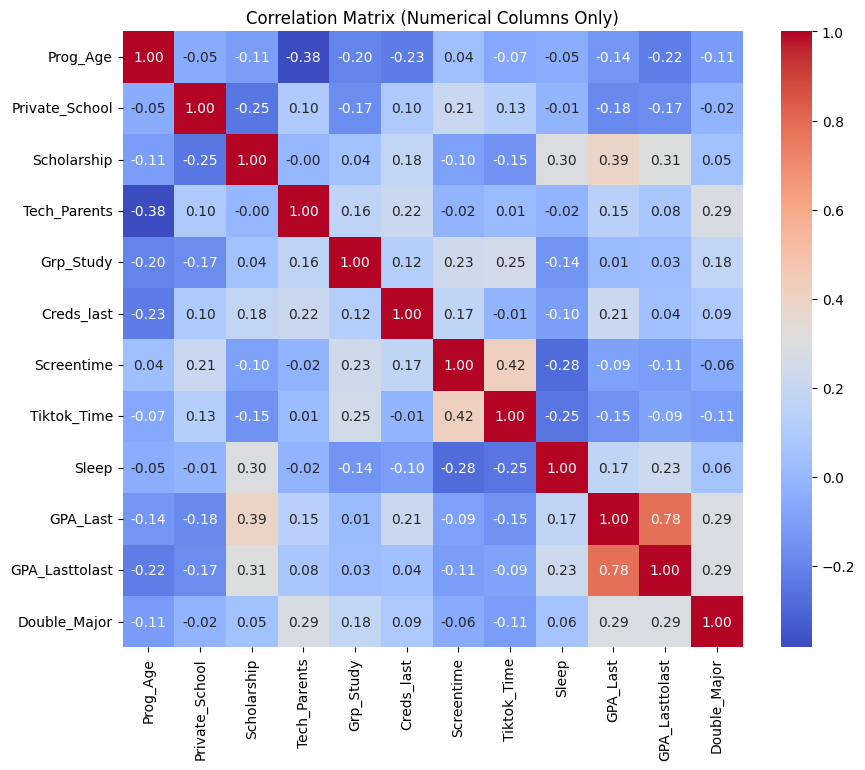

Factors with the least correlation with GPA_Last (in ascending order of correlation):
Grp_Study         0.012792
Screentime       -0.092898
Prog_Age         -0.137303
Tech_Parents      0.146477
Tiktok_Time      -0.153011
Sleep             0.173448
Private_School   -0.180934
Creds_last        0.214124
Double_Major      0.290255
Scholarship       0.387042
GPA_Lasttolast    0.780834
Name: GPA_Last, dtype: float64


Factors with the least correlation with GPA_Lasttolast (in ascending order of correlation):
Grp_Study         0.025824
Creds_last        0.041842
Tech_Parents      0.076314
Tiktok_Time      -0.090115
Screentime       -0.110865
Private_School   -0.169371
Prog_Age         -0.223053
Sleep             0.230798
Double_Major      0.291265
Scholarship       0.306636
GPA_Last          0.780834
Name: GPA_Lasttolast, dtype: float64


In [ ]:
# Select only numerical columns for correlation matrix
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Compute the correlation matrix
corr_matrix = df[numerical_cols].corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix (Numerical Columns Only)')
plt.show()

# Identify factors with the least correlation with GPA_Last
gpa_corr = corr_matrix['GPA_Last'].drop('GPA_Last')  # Exclude self-correlation
least_correlated = gpa_corr.abs().sort_values().index.tolist()  # Sort by absolute correlation

# Identify factors with the least correlation with GPA_Lasttolast
gpa_prev_corr = corr_matrix['GPA_Lasttolast'].drop('GPA_Lasttolast')  # Exclude self-correlation
least_prev_correlated = gpa_prev_corr.abs().sort_values().index.tolist()  # Sort by absolute correlation

print("Factors with the least correlation with GPA_Last (in ascending order of correlation):")
print(gpa_corr[least_correlated])
print("\n")
print("Factors with the least correlation with GPA_Lasttolast (in ascending order of correlation):")
print(gpa_prev_corr[least_prev_correlated])

In [ ]:
# List of categorical variables to test
categorical_vars = ['State', 'Major', 'Private_School', 'Scholarship', 'Tech_Parents', 'Grp_Study', 'Notes']

# Function to perform ANOVA for each category
def perform_anova_1(df, category, target='GPA_Last'):
    unique_values = df[category].dropna().unique()
    groups = [df[df[category] == val][target] for val in unique_values]
    anova_result = stats.f_oneway(*groups)
    print(f"ANOVA for {category}:")
    print(f"P-value: {anova_result.pvalue}")
    if anova_result.pvalue < 0.05:
        print(f"Conclusion: {category} significantly impacts {target}.")
    else:
        print(f"Conclusion: {category} does NOT significantly impact {target}.")
    print("-" * 50)
    return anova_result.pvalue

# Function to perform ANOVA for each category
def perform_anova_2(df, category, target='GPA_Lasttolast'):
    unique_values = df[category].dropna().unique()
    groups = [df[df[category] == val][target] for val in unique_values]
    anova_result = stats.f_oneway(*groups)
    print(f"ANOVA for {category}:")
    print(f"P-value: {anova_result.pvalue}")
    if anova_result.pvalue < 0.05:
        print(f"Conclusion: {category} significantly impacts {target}.")
    else:
        print(f"Conclusion: {category} does NOT significantly impact {target}.")
    print("-" * 50)
    return anova_result.pvalue

# Perform ANOVA for all specified categorical variables
for category in categorical_vars:
    p_val1 = perform_anova_1(df, category)
    p_val2 = perform_anova_2(df, category)
    print(p_val1 + p_val2)
    print("\n")

ANOVA for State:
P-value: 0.2750937730850789
Conclusion: State does NOT significantly impact GPA_Last.
--------------------------------------------------
ANOVA for State:
P-value: 0.3376763309974308
Conclusion: State does NOT significantly impact GPA_Lasttolast.
--------------------------------------------------
0.6127701040825096


ANOVA for Major:
P-value: 0.17267830845613824
Conclusion: Major does NOT significantly impact GPA_Last.
--------------------------------------------------
ANOVA for Major:
P-value: 0.1493873158331553
Conclusion: Major does NOT significantly impact GPA_Lasttolast.
--------------------------------------------------
0.32206562428929353


ANOVA for Private_School:
P-value: 0.14919780536978927
Conclusion: Private_School does NOT significantly impact GPA_Last.
--------------------------------------------------
ANOVA for Private_School:
P-value: 0.1774052897229328
Conclusion: Private_School does NOT significantly impact GPA_Lasttolast.
----------------------------

In [ ]:
numerical_vars = ["Prog_Age", "Creds_last", "Screentime", "Tiktok_Time", "Sleep"]

# Perform Pearson correlation test for each variable
def pearson_hyp_test(df, numerical_vars, targets):
    for target in targets:
        print(f"\nPearson Hypothesis Test for {target}:")
        print("-" * 50)
        for var in numerical_vars:
            # Compute Pearson correlation and p-value
            corr, p_value = stats.pearsonr(df[var], df[target])
            print(f"{var}: Correlation = {corr:.3f}, P-value = {p_value:.3e}")

            # Interpret results
            if p_value < 0.05:
                print(f"  -> {var} significantly correlates with {target}.")
            else:
                print(f"  -> {var} does NOT significantly correlate with {target}.")
        print("\n")

# Apply the function to your dataset for GPA_Last and GPA_Lasttolast
pearson_hyp_test(df, numerical_vars, ["GPA_Last", "GPA_Lasttolast"])


Pearson Hypothesis Test for GPA_Last:
--------------------------------------------------
Prog_Age: Correlation = -0.137, P-value = 2.754e-01
  -> Prog_Age does NOT significantly correlate with GPA_Last.
Creds_last: Correlation = 0.214, P-value = 8.676e-02
  -> Creds_last does NOT significantly correlate with GPA_Last.
Screentime: Correlation = -0.093, P-value = 4.617e-01
  -> Screentime does NOT significantly correlate with GPA_Last.
Tiktok_Time: Correlation = -0.153, P-value = 2.237e-01
  -> Tiktok_Time does NOT significantly correlate with GPA_Last.
Sleep: Correlation = 0.173, P-value = 1.670e-01
  -> Sleep does NOT significantly correlate with GPA_Last.



Pearson Hypothesis Test for GPA_Lasttolast:
--------------------------------------------------
Prog_Age: Correlation = -0.223, P-value = 7.410e-02
  -> Prog_Age does NOT significantly correlate with GPA_Lasttolast.
Creds_last: Correlation = 0.042, P-value = 7.407e-01
  -> Creds_last does NOT significantly correlate with GPA_Lastt

#2. Which factor(s) didn't matter in predicting the GPA?

Your answer: The factors that do not statistically help in predicting the GPA in the given dataset are Grp_Study, State, Major, Tech_Parents, Private_School, Notes, Screentime, Prog_Age, Creds_Last, Tiktok_Time, and Sleep.

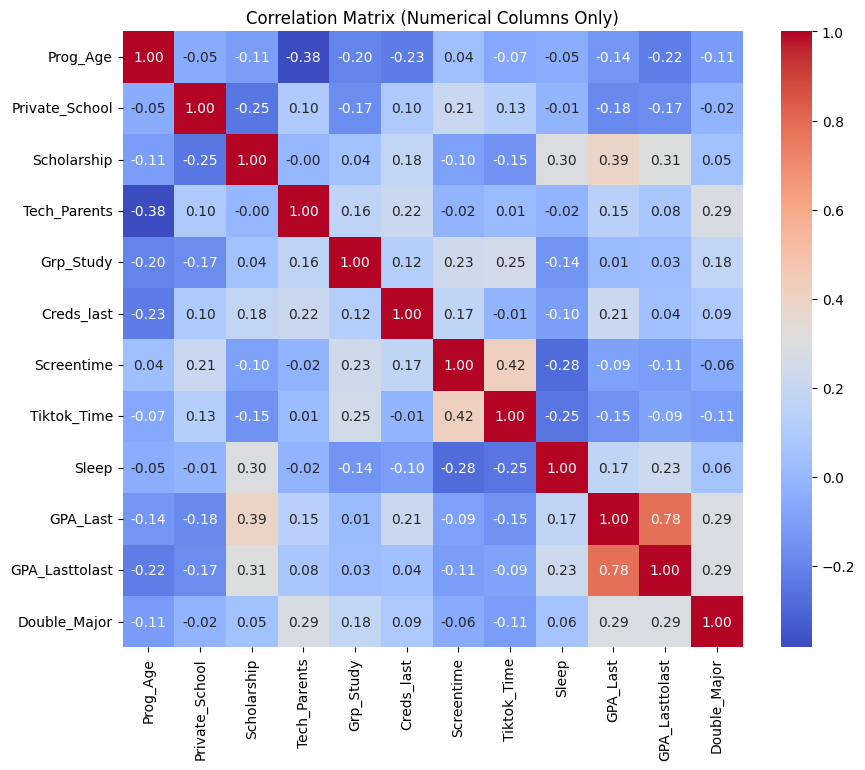

Factors with the least correlation with GPA_Last (in ascending order of correlation):
Grp_Study         0.012792
Screentime       -0.092898
Prog_Age         -0.137303
Tech_Parents      0.146477
Tiktok_Time      -0.153011
Sleep             0.173448
Private_School   -0.180934
Creds_last        0.214124
Double_Major      0.290255
Scholarship       0.387042
GPA_Lasttolast    0.780834
Name: GPA_Last, dtype: float64


Factors with the least correlation with GPA_Lasttolast (in ascending order of correlation):
Grp_Study         0.025824
Creds_last        0.041842
Tech_Parents      0.076314
Tiktok_Time      -0.090115
Screentime       -0.110865
Private_School   -0.169371
Prog_Age         -0.223053
Sleep             0.230798
Double_Major      0.291265
Scholarship       0.306636
GPA_Last          0.780834
Name: GPA_Lasttolast, dtype: float64


In [ ]:
# Select only numerical columns for correlation matrix
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Compute the correlation matrix
corr_matrix = df[numerical_cols].corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix (Numerical Columns Only)')
plt.show()

# Identify factors with the least correlation with GPA_Last
gpa_corr = corr_matrix['GPA_Last'].drop('GPA_Last')  # Exclude self-correlation
least_correlated = gpa_corr.abs().sort_values().index.tolist()  # Sort by absolute correlation

# Identify factors with the least correlation with GPA_Lasttolast
gpa_prev_corr = corr_matrix['GPA_Lasttolast'].drop('GPA_Lasttolast')  # Exclude self-correlation
least_prev_correlated = gpa_prev_corr.abs().sort_values().index.tolist()  # Sort by absolute correlation

print("Factors with the least correlation with GPA_Last (in ascending order of correlation):")
print(gpa_corr[least_correlated])
print("\n")
print("Factors with the least correlation with GPA_Lasttolast (in ascending order of correlation):")
print(gpa_prev_corr[least_prev_correlated])

Here the Group Study element doesnt seem like it plays a big role in determining GPA of the last two semesters.

In [ ]:
# List of categorical variables to test
categorical_vars = ['State', 'Major', 'Private_School', 'Scholarship', 'Tech_Parents', 'Grp_Study', 'Notes']

# Function to perform ANOVA for each category
def perform_anova_1(df, category, target='GPA_Last'):
    unique_values = df[category].dropna().unique()
    groups = [df[df[category] == val][target] for val in unique_values]
    anova_result = stats.f_oneway(*groups)
    print(f"ANOVA for {category}:")
    print(f"P-value: {anova_result.pvalue}")
    if anova_result.pvalue < 0.05:
        print(f"Conclusion: {category} significantly impacts {target}.")
    else:
        print(f"Conclusion: {category} does NOT significantly impact {target}.")
    print("-" * 50)
    return anova_result.pvalue

# Function to perform ANOVA for each category
def perform_anova_2(df, category, target='GPA_Lasttolast'):
    unique_values = df[category].dropna().unique()
    groups = [df[df[category] == val][target] for val in unique_values]
    anova_result = stats.f_oneway(*groups)
    print(f"ANOVA for {category}:")
    print(f"P-value: {anova_result.pvalue}")
    if anova_result.pvalue < 0.05:
        print(f"Conclusion: {category} significantly impacts {target}.")
    else:
        print(f"Conclusion: {category} does NOT significantly impact {target}.")
    print("-" * 50)
    return anova_result.pvalue

# Perform ANOVA for all specified categorical variables
for category in categorical_vars:
    p_val1 = perform_anova_1(df, category)
    p_val2 = perform_anova_2(df, category)
    print(p_val1 + p_val2)
    print("\n")

ANOVA for State:
P-value: 0.2750937730850789
Conclusion: State does NOT significantly impact GPA_Last.
--------------------------------------------------
ANOVA for State:
P-value: 0.3376763309974308
Conclusion: State does NOT significantly impact GPA_Lasttolast.
--------------------------------------------------
0.6127701040825096


ANOVA for Major:
P-value: 0.17267830845613824
Conclusion: Major does NOT significantly impact GPA_Last.
--------------------------------------------------
ANOVA for Major:
P-value: 0.1493873158331553
Conclusion: Major does NOT significantly impact GPA_Lasttolast.
--------------------------------------------------
0.32206562428929353


ANOVA for Private_School:
P-value: 0.14919780536978927
Conclusion: Private_School does NOT significantly impact GPA_Last.
--------------------------------------------------
ANOVA for Private_School:
P-value: 0.1774052897229328
Conclusion: Private_School does NOT significantly impact GPA_Lasttolast.
----------------------------

Grp_Study, Tech_Parents, State, Notes, Private_School & Major have the least correlation and in that order

In [ ]:
numerical_vars = ["Prog_Age", "Creds_last", "Screentime", "Tiktok_Time", "Sleep"]

# Perform Pearson correlation test for each variable
def pearson_hyp_test(df, numerical_vars, targets):
    for target in targets:
        print(f"\nPearson Hypothesis Test for {target}:")
        print("-" * 50)
        for var in numerical_vars:
            # Compute Pearson correlation and p-value
            corr, p_value = stats.pearsonr(df[var], df[target])
            print(f"{var}: Correlation = {corr:.3f}, P-value = {p_value:.3e}")

            # Interpret results
            if p_value < 0.05:
                print(f"  -> {var} significantly correlates with {target}.")
            else:
                print(f"  -> {var} does NOT significantly correlate with {target}.")
        print("\n")

# Apply the function to your dataset for GPA_Last and GPA_Lasttolast
pearson_hyp_test(df, numerical_vars, ["GPA_Last", "GPA_Lasttolast"])


Pearson Hypothesis Test for GPA_Last:
--------------------------------------------------
Prog_Age: Correlation = -0.137, P-value = 2.754e-01
  -> Prog_Age does NOT significantly correlate with GPA_Last.
Creds_last: Correlation = 0.214, P-value = 8.676e-02
  -> Creds_last does NOT significantly correlate with GPA_Last.
Screentime: Correlation = -0.093, P-value = 4.617e-01
  -> Screentime does NOT significantly correlate with GPA_Last.
Tiktok_Time: Correlation = -0.153, P-value = 2.237e-01
  -> Tiktok_Time does NOT significantly correlate with GPA_Last.
Sleep: Correlation = 0.173, P-value = 1.670e-01
  -> Sleep does NOT significantly correlate with GPA_Last.



Pearson Hypothesis Test for GPA_Lasttolast:
--------------------------------------------------
Prog_Age: Correlation = -0.223, P-value = 7.410e-02
  -> Prog_Age does NOT significantly correlate with GPA_Lasttolast.
Creds_last: Correlation = 0.042, P-value = 7.407e-01
  -> Creds_last does NOT significantly correlate with GPA_Lastt

#3. Besides the GPA information, which two questions had the highest correlation?

Your answer: These two were most Highly correlated: \
1. What is your average daily time on Tik Tok or Tik Tok equivalents?
2. What is your average screentime?

In [ ]:
encoded_df = df.copy()
label_encoder = LabelEncoder()
columns=['State', 'Major', 'Notes']
for col in columns:
    if encoded_df[col].dtype == 'object':
        encoded_df[col] = label_encoder.fit_transform(df[col])

In [ ]:
# Compute correlation matrix
corr_matrix = encoded_df.corr()

# Unstack the correlation matrix to find the pairwise correlations
corr_pairs = corr_matrix.unstack().reset_index()
corr_pairs.columns = ['Feature1', 'Feature2', 'Correlation']

# Remove self-correlations
corr_pairs = corr_pairs[corr_pairs['Feature1'] != corr_pairs['Feature2']]

# Find the two questions with the highest correlation
highest_corr = corr_pairs.sort_values(by='Correlation', ascending=False)

print("Two questions with the highest correlation:")
print(highest_corr)

Two questions with the highest correlation:
           Feature1        Feature2  Correlation
29            Major    Double_Major     0.963334
211    Double_Major           Major     0.963334
207  GPA_Lasttolast        GPA_Last     0.780834
193        GPA_Last  GPA_Lasttolast     0.780834
159     Tiktok_Time      Screentime     0.417468
..              ...             ...          ...
116           Notes           Sleep    -0.274152
174           Sleep      Screentime    -0.283797
146      Screentime           Sleep    -0.283797
35         Prog_Age    Tech_Parents    -0.382704
77     Tech_Parents        Prog_Age    -0.382704

[210 rows x 3 columns]


#4. Which one had more impact on students' quality of sleep, the amount of screen time or course load?

Your answer: Screentime (P-value:  = 0.02) has a greater Impact on sleep than course load (P-value:  = 0.4).

In [ ]:
# Correlation between Sleep and Screentime
corr_screentime, p_screentime = stats.pearsonr(df['Sleep'], df['Screentime'])
print(f"Correlation between Sleep and Screentime: {corr_screentime:.3f}, P-value: {p_screentime:.3e}")

# Correlation between Sleep and Creds_last
corr_creds, p_creds = stats.pearsonr(df['Sleep'], df['Creds_last'])
print(f"Correlation between Sleep and Creds_last: {corr_creds:.3f}, P-value: {p_creds:.3e}")

Correlation between Sleep and Screentime: -0.284, P-value: 2.196e-02
Correlation between Sleep and Creds_last: -0.102, P-value: 4.182e-01


In [ ]:
# Linear regression: Sleep vs Screentime
X_screentime = df[['Screentime']].values
y_sleep = df['Sleep'].values
model_screentime = LinearRegression()
model_screentime.fit(X_screentime, y_sleep)
r2_screentime = r2_score(y_sleep, model_screentime.predict(X_screentime))

# Linear regression: Sleep vs Creds_last
X_creds = df[['Creds_last']].values
model_creds = LinearRegression()
model_creds.fit(X_creds, y_sleep)
r2_creds = r2_score(y_sleep, model_creds.predict(X_creds))

print(f"R² for Sleep vs Screentime: {r2_screentime:.3f}")
print(f"R² for Sleep vs Creds_last: {r2_creds:.3f}")

R² for Sleep vs Screentime: 0.081
R² for Sleep vs Creds_last: 0.010


In [ ]:
# Test significance of Screentime's impact on Sleep
t_stat_screentime, p_val_screentime = stats.ttest_1samp(df['Screentime'], 0)
print(f"T-test for Screentime's impact on Sleep: T-stat = {t_stat_screentime:.3f}, P-value = {p_val_screentime:.3e}")

# Test significance of Creds_last's impact on Sleep
t_stat_creds, p_val_creds = stats.ttest_1samp(df['Creds_last'], 0)
print(f"T-test for Creds_last's impact on Sleep: T-stat = {t_stat_creds:.3f}, P-value = {p_val_creds:.3e}")

T-test for Screentime's impact on Sleep: T-stat = 17.803, P-value = 1.759e-26
T-test for Creds_last's impact on Sleep: T-stat = 61.926, P-value = 7.736e-59


#5. Does having a parent (or more) in tech have impact on the starting age for programming?

Your answer: Yes it does. There is a negative correlation with a very low p-value (to the order of 10^-3). This means that more the parents one has in tech, more likely is it for them to start programming at an earlier age.  

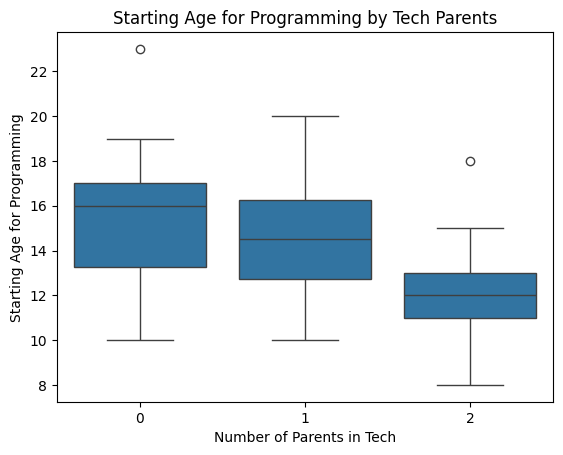

              count       mean       std   min    25%   50%    75%   max
Tech_Parents                                                            
0              34.0  15.264706  2.863658  10.0  13.25  16.0  17.00  23.0
1              16.0  14.562500  2.874456  10.0  12.75  14.5  16.25  20.0
2              15.0  12.333333  2.439750   8.0  11.00  12.0  13.00  18.0


In [ ]:
# Boxplot for visualization
sns.boxplot(x='Tech_Parents', y='Prog_Age', data=df)
plt.title("Starting Age for Programming by Tech Parents")
plt.xlabel("Number of Parents in Tech")
plt.ylabel("Starting Age for Programming")
plt.show()

# Summary statistics
print(df.groupby('Tech_Parents')['Prog_Age'].describe())

In [ ]:
# Pearson correlation
corr, p_value = stats.pearsonr(df['Tech_Parents'], df['Prog_Age'])
print(f"Pearson Correlation: {corr:.3f}, P-value: {p_value:.3e}")

Pearson Correlation: -0.383, P-value: 1.654e-03


In [ ]:
# ANOVA
anova_result = stats.f_oneway(
    df[df['Tech_Parents'] == 0]['Prog_Age'],
    df[df['Tech_Parents'] == 1]['Prog_Age'],
    df[df['Tech_Parents'] == 2]['Prog_Age']
)

print(f"ANOVA F-statistic: {anova_result.statistic:.3f}, P-value: {anova_result.pvalue:.3e}")

if anova_result.pvalue < 0.05:
    print("Conclusion: Tech_Parents significantly impacts Prog_Age.")
else:
    print("Conclusion: Tech_Parents does NOT significantly impact Prog_Age.")

ANOVA F-statistic: 5.831, P-value: 4.780e-03
Conclusion: Tech_Parents significantly impacts Prog_Age.


#6. Assume that the students who gave response to this survey have a consistent studying habit. Based on that assumption, does studying with friends help with grades? What about note taking?



Your answer: Grp_Study (P-value is around 0.7) Has no statistical effect in GPA of either semesters.

Although note-taking (P-value is 0.09 for 1 sem and 0.2 for the other) methods do not have a statistically significant effect on GPA, there is a slight trend suggesting that taking notes on paper might correlate with better grades, while tablet note-taking might correlate with slightly worse grades.

Corr for GPA_Last
Pearson Correlation: 0.013, P-value: 9.194e-01
Corr for GPA_Last
Pearson Correlation: 0.026, P-value: 8.382e-01

ANOVA Results for Grp_Study:
GPA_Last - F-statistic: 0.256, P-value: 7.753e-01
GPA_Lasttolast - F-statistic: 0.842, P-value: 4.356e-01


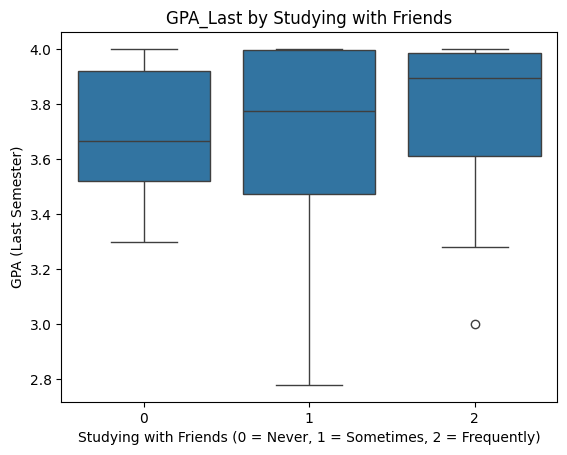

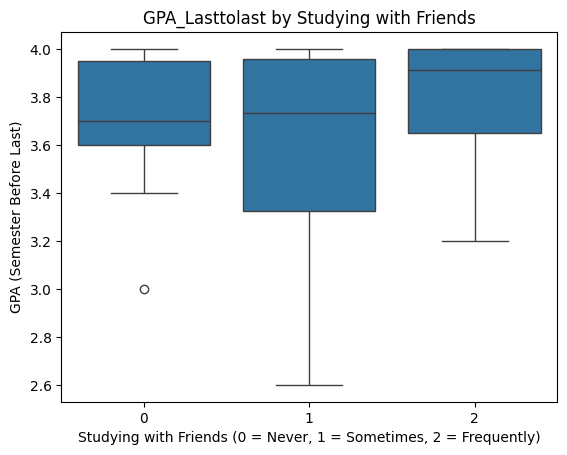

In [ ]:
# Pearson correlation
corr, p_value = stats.pearsonr(df['Grp_Study'], df['GPA_Last'])
print("Corr for GPA_Last")
print(f"Pearson Correlation: {corr:.3f}, P-value: {p_value:.3e}")

corr, p_value = stats.pearsonr(df['Grp_Study'], df['GPA_Lasttolast'])
print("Corr for GPA_Last")
print(f"Pearson Correlation: {corr:.3f}, P-value: {p_value:.3e}")

# Hypothesis Testing
anova_grp_last = stats.f_oneway(
    df[df['Grp_Study'] == 0]['GPA_Last'],
    df[df['Grp_Study'] == 1]['GPA_Last'],
    df[df['Grp_Study'] == 2]['GPA_Last']
)

anova_grp_lasttolast = stats.f_oneway(
    df[df['Grp_Study'] == 0]['GPA_Lasttolast'],
    df[df['Grp_Study'] == 1]['GPA_Lasttolast'],
    df[df['Grp_Study'] == 2]['GPA_Lasttolast']
)

print("\nANOVA Results for Grp_Study:")
print(f"GPA_Last - F-statistic: {anova_grp_last.statistic:.3f}, P-value: {anova_grp_last.pvalue:.3e}")
print(f"GPA_Lasttolast - F-statistic: {anova_grp_lasttolast.statistic:.3f}, P-value: {anova_grp_lasttolast.pvalue:.3e}")

# Boxplots for Grp_Study
sns.boxplot(x='Grp_Study', y='GPA_Last', data=df)
plt.title("GPA_Last by Studying with Friends")
plt.xlabel("Studying with Friends (0 = Never, 1 = Sometimes, 2 = Frequently)")
plt.ylabel("GPA (Last Semester)")
plt.show()

sns.boxplot(x='Grp_Study', y='GPA_Lasttolast', data=df)
plt.title("GPA_Lasttolast by Studying with Friends")
plt.xlabel("Studying with Friends (0 = Never, 1 = Sometimes, 2 = Frequently)")
plt.ylabel("GPA (Semester Before Last)")
plt.show()



Descriptive Statistics for Notes:
         GPA_Last                                                         \
            count      mean       std   min      25%     50%    75%  max   
Notes                                                                      
Computer     14.0  3.663500  0.238551  3.28  3.52500  3.6125  3.849  4.0   
No            7.0  3.653714  0.365235  2.90  3.58800  3.8000  3.850  4.0   
Paper        30.0  3.767200  0.310913  2.92  3.58025  3.9250  4.000  4.0   
Tablet       14.0  3.497286  0.402856  2.78  3.17075  3.4990  3.870  4.0   

         GPA_Lasttolast                                                         
                  count      mean       std   min    25%     50%      75%  max  
Notes                                                                           
Computer           14.0  3.706000  0.265216  3.22  3.627  3.7000  3.93350  4.0  
No                  7.0  3.623429  0.347144  3.00  3.450  3.7640  3.85000  4.0  
Paper              30.0  3.

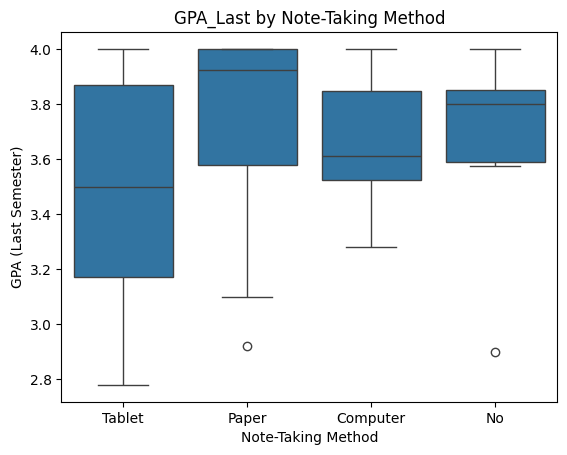

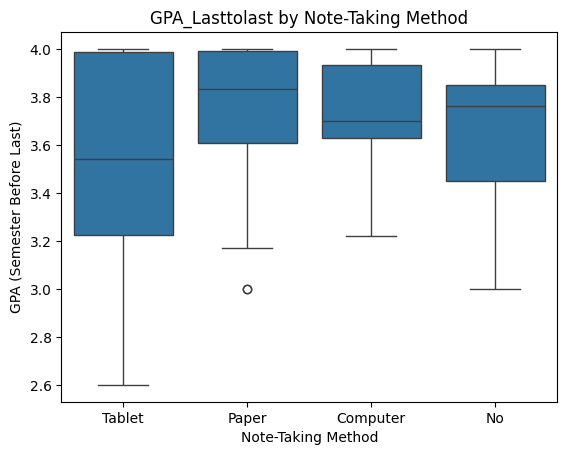

In [ ]:
# One-hot encode Notes
df_encoded = pd.get_dummies(df, columns=['Notes'])

print("\nDescriptive Statistics for Notes:")
print(df.groupby('Notes')[['GPA_Last', 'GPA_Lasttolast']].describe())

# Hypothesis Testing
# ANOVA for Notes
anova_notes_last = stats.f_oneway(
    df_encoded[df_encoded['Notes_Tablet'] == 1]['GPA_Last'],
    df_encoded[df_encoded['Notes_Paper'] == 1]['GPA_Last'],
    df_encoded[df_encoded['Notes_Computer'] == 1]['GPA_Last'],
    df_encoded[df_encoded['Notes_No'] == 1]['GPA_Last'],
)

anova_notes_lasttolast = stats.f_oneway(
    df_encoded[df_encoded['Notes_Tablet'] == 1]['GPA_Lasttolast'],
    df_encoded[df_encoded['Notes_Paper'] == 1]['GPA_Lasttolast'],
    df_encoded[df_encoded['Notes_Computer'] == 1]['GPA_Lasttolast'],
    df_encoded[df_encoded['Notes_No'] == 1]['GPA_Lasttolast']
)

print("\nANOVA Results for Notes:")
print(f"GPA_Last - F-statistic: {anova_notes_last.statistic:.3f}, P-value: {anova_notes_last.pvalue:.3e}")
print(f"GPA_Lasttolast - F-statistic: {anova_notes_lasttolast.statistic:.3f}, P-value: {anova_notes_lasttolast.pvalue:.3e}")

# Boxplots for Notes
sns.boxplot(x='Notes', y='GPA_Last', data=df)
plt.title("GPA_Last by Note-Taking Method")
plt.xlabel("Note-Taking Method")
plt.ylabel("GPA (Last Semester)")
plt.show()

sns.boxplot(x='Notes', y='GPA_Lasttolast', data=df)
plt.title("GPA_Lasttolast by Note-Taking Method")
plt.xlabel("Note-Taking Method")
plt.ylabel("GPA (Semester Before Last)")
plt.show()